In [1]:
from deap import base
from deap import tools
from deap import creator

import random
import matplotlib.pyplot as plt

# Problem Constraints
ONE_MAX_LENGTH = 100

# Genetic Algorithm constants
POPULATION_SIZE = 200
P_CROSSOVER = 0.9 # Probability of crossover
P_MUTATION = 0.1 # Probability of mutation
MAX_GENERATIONS = 50

# Set random seed
random.seed(42)

# Initialize toolbox class
toolbox = base.Toolbox()

# Step 1: Choosing the chromosome

Each individual will have a chromosome which is represented by a binary string that directly represents a candidate solution. Example: [1, 0, 0, 1, 0]

In [2]:
# Create an operator that randomly returns 0 or 1
toolbox.register(
    alias="zeroOrOne", 
    function=random.randint, 
    a=0, 
    b=1
)

# Step 2: Calculating the fitness

In [3]:
# Define a single objective maximizing fitness strategy
creator.create(
    name="FitnessMax",
    base=base.Fitness,
    weights=(1.0,)
)

def oneMaxFitness(individual):
    return sum(individual),

toolbox.register(
    alias="evaluate",
    function=oneMaxFitness
)

# Step 3: Create Population

In [4]:
creator.create(
    name="Individual",
    base=list,
    fitness=creator.FitnessMax
)

toolbox.register(
    alias="individualCreator",
    function=tools.initRepeat,
    container=creator.Individual,
    func=toolbox.zeroOrOne,
    n=ONE_MAX_LENGTH    
)

toolbox.register(
    alias="populationCreator",
    function=tools.initRepeat,
    container=list,
    func=toolbox.individualCreator
)

# Step 4: Choosing the genetic operators

In [5]:
# Tournament selection
toolbox.register(
    alias="select",
    function=tools.selTournament,
    tournsize=3
)

# 1-Point crossover
toolbox.register(
    alias="mate",
    function=tools.cxOnePoint
)

# Flip-bit mutation
toolbox.register(
    alias="mutate",
    function=tools.mutFlipBit,
    indpb=1.0/ONE_MAX_LENGTH
)

# Step 5: Integrate everything

In [6]:
def main():
       
    # Create initial population
    population = toolbox.populationCreator(n=POPULATION_SIZE)
            
    # Calculate fitness values of initial population
    fitnessValues = list(map(toolbox.evaluate, population))
    
    # Assign fitnessValue to each individual
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue
    
    # Extract fitness values from individuals
    fitnessValues = [individual.fitness.values[0] for individual in population]
    
    # Initialize statistics accumulators
    maxFitnessValues = []
    meanFitnessValues = []
    
    # Main evolutionary loop
    generationCounter = 0
    while (max(fitnessValues) < ONE_MAX_LENGTH and
           generationCounter < MAX_GENERATIONS):
        
        generationCounter += 1
        
        # Apply selection operator
        offspring = toolbox.select(
            population,
            len(population)
        )
        
        # Clone selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover operator (individuals are modified in place)
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                # fitness values are no longer valid after crossover
                del child1.fitness.values 
                del child2.fitness.values
                
        # Apply mutation operator (individuals are modified in place)
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                # fitness values are no longer valid after mutation
                del mutant.fitness.values
                
        # Recalculate fitness values for modified individuals
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue
        
        # Replace old population with new generation
        population[:] = offspring
        
        # Collate fitness values of current generation for statistical gathering
        fitnessValues = [ind.fitness.values[0] for ind in population]
        
        # Statistics 
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print(f"- Generation {generationCounter}: Max Fitness = {maxFitness}, Avg Fitness = {meanFitness}")
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best individual = ", *population[best_index], "\n")
        
    # Plotting
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel("Generation")
    plt.ylabel("Max / Average Fitness")
    plt.title("Max and Average fitness over Generations")
    plt.grid()
    plt.show()

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

Best individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 35: Max Fitness = 98.0, Avg Fitness = 96.835
Best individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 36: Max Fitness = 98.0, Avg Fitness = 97.18
Best individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Generation 37: Max Fitness = 99.0, Avg Fitness = 97.655
Best individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

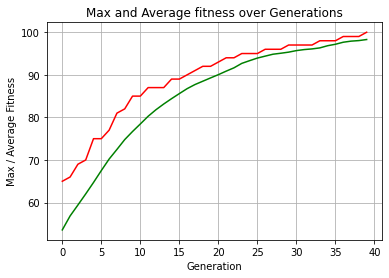

In [7]:
main()